In [1]:
#use appropriate header files 
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
from keras import regularizers
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
#define an encoding dimension 
encoding_dim=32

In [3]:
#this is an input placeholder 
#input_img = Input(shape=(28, 28, 1))
input_img = Input(shape=(784,))

In [4]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#encoded = Dense(encoding_dim, activation='relu',
               # activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [5]:
# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [7]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
from keras.callbacks import TensorBoard

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3255 - val_loss: 0.2576
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2388 - val_loss: 0.2191
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2074 - val_loss: 0.1950
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.1891 - val_loss: 0.1811
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.1778 - val_loss: 0.1717
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.1693 - val_loss: 0.1640
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1621 - val_loss: 0.1574
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1557 - val_loss: 0.1514
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1501 - val_loss: 0.1460
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1450 - val_loss: 0.1412

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
import matplotlib.pyplot as plt

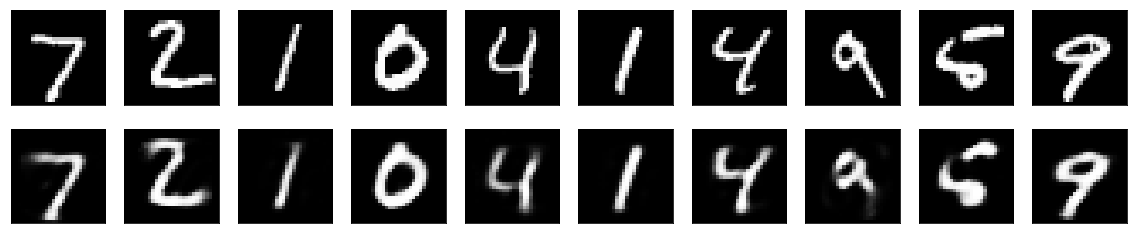

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()